# CoreBench #


📊 Benchmark Analysis: QuickSort on MicroControllers
This notebook analyzes and compares the performance of the QuickSort algorithm—both single-core and dual-core implementations—executed on two microcontroller platforms: ESP32 and ESP32S3.

The dataset includes execution times for different input sizes, allowing visual comparison of sorting efficiency across platforms and configurations. The goal is to evaluate how each platform scales with increasing data sizes and to assess the benefits of dual-core processing.

Key components:

Data cleaning and filtering

Performance plots for ESP32 and ESP32S3

Visual comparisons between QuickSort and QuickSort_DualCore

Clone to drive file.
https://docs.google.com/spreadsheets/d/14JbC74Bb0fRlNowO_PPvexM4IoGGFCY1/edit?usp=sharing&ouid=108412164456233634725&rtpof=true&sd=true

### All Libraries

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

### Read the dataset

In [54]:
from google.colab import drive
drive.mount('/content/drive')

# Full path to the file on Google Drive
caminho = '/content/drive/My Drive/Colab Notebooks/CoreBenchProject/Result_QuickSort_ESP.xlsx'

# Read the Excel file
df = pd.read_excel(caminho)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
# Assigning column values to variables (no need to change)
Chip = df['Chip'].values
Algoritmo = df['Algoritmo'].values
N_Elementos = df['N Elementos'].values
Execuções = df['Execuções'].values
Tempo_Médio_us = df['Tempo Médio (us)'].values

## Filter.

In [56]:
df.isnull().sum()

,0
Chip,2
Algoritmo,2
N Elementos,2
Execuções,2
Tempo Médio (us),2


## ESP32


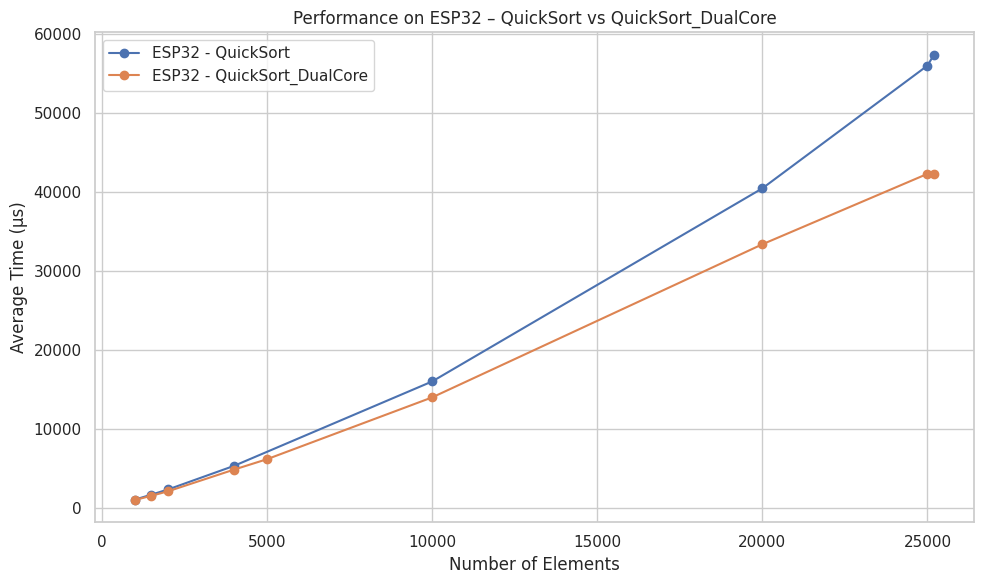

In [57]:
# Set style
sns.set(style="whitegrid")

# Filter only ESP32 and the two algorithms
df_esp32 = df[(df['Chip'] == 'ESP32') & df['Algoritmo'].isin(['QuickSort', 'QuickSort_DualCore'])]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot lines for each algorithm
for algorithm in ['QuickSort', 'QuickSort_DualCore']:
    data = df_esp32[df_esp32['Algoritmo'] == algorithm]
    data = data.groupby('N Elementos', as_index=False)['Tempo Médio (us)'].mean()
    plt.plot(data['N Elementos'], data['Tempo Médio (us)'],
             marker='o', label=f"ESP32 - {algorithm}")

# Labels and title in English
plt.title("Performance on ESP32 – QuickSort vs QuickSort_DualCore")
plt.xlabel("Number of Elements")
plt.ylabel("Average Time (µs)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## ESP32S (ESP-CAM)


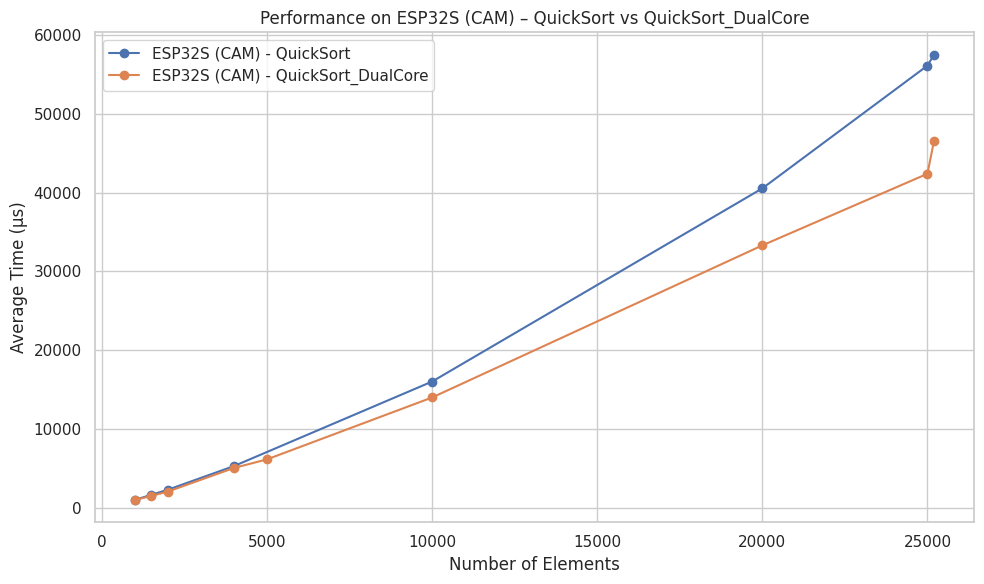

In [58]:
# Set style
sns.set(style="whitegrid")

# Filter only ESP32S (CAM) and the two algorithms (ATUALIZADO)
df_esp32s_cam = df[(df['Chip'] == 'ESP32S (CAM)') & df['Algoritmo'].isin(['QuickSort', 'QuickSort_DualCore'])]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot lines for each algorithm (ATUALIZADO)
for algorithm in ['QuickSort', 'QuickSort_DualCore']:
    data = df_esp32s_cam[df_esp32s_cam['Algoritmo'] == algorithm]
    data = data.groupby('N Elementos', as_index=False)['Tempo Médio (us)'].mean()
    plt.plot(data['N Elementos'], data['Tempo Médio (us)'],
             marker='o', label=f"ESP32S (CAM) - {algorithm}")  # Label atualizado

# Labels and title in English (ATUALIZADO)
plt.title("Performance on ESP32S (CAM) – QuickSort vs QuickSort_DualCore")
plt.xlabel("Number of Elements")
plt.ylabel("Average Time (µs)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## ESP32S3


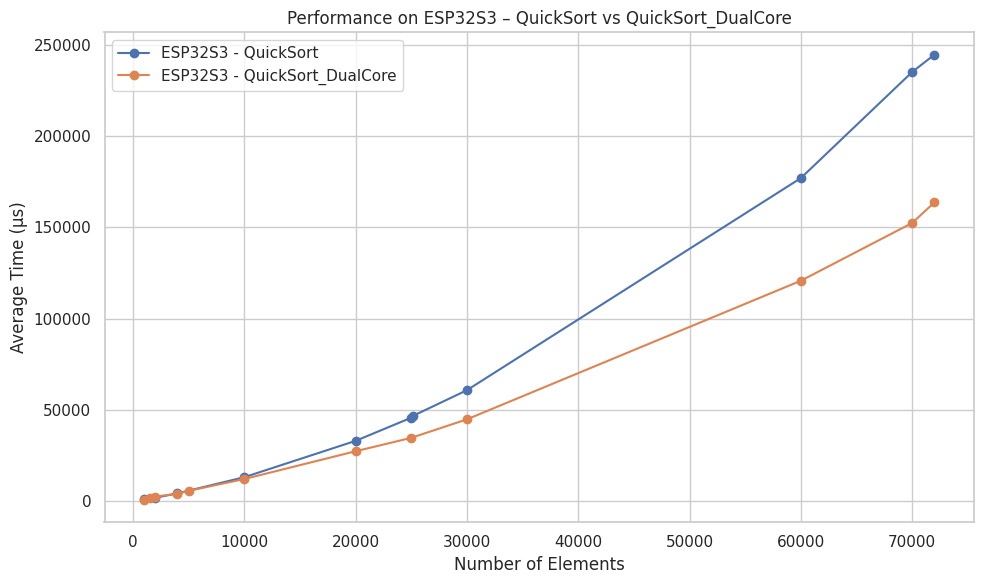

In [59]:
# Set style
sns.set(style="whitegrid")

# Filter only ESP32S3 and the two algorithms
df_esp32s3 = df[(df['Chip'] == 'ESP32S3') & df['Algoritmo'].isin(['QuickSort', 'QuickSort_DualCore'])]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot lines for each algorithm
for algorithm in ['QuickSort', 'QuickSort_DualCore']:
    data = df_esp32s3[df_esp32s3['Algoritmo'] == algorithm]
    data = data.groupby('N Elementos', as_index=False)['Tempo Médio (us)'].mean()
    plt.plot(data['N Elementos'], data['Tempo Médio (us)'],
             marker='o', label=f"ESP32S3 - {algorithm}")

# Labels and title in English
plt.title("Performance on ESP32S3 – QuickSort vs QuickSort_DualCore")
plt.xlabel("Number of Elements")
plt.ylabel("Average Time (µs)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## All MicroControllers


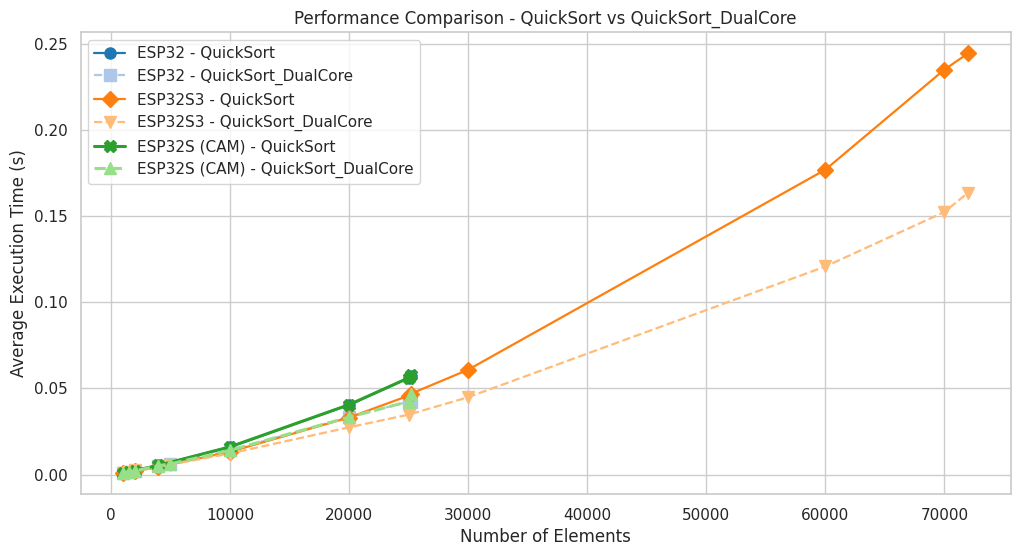

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# Seaborn style
sns.set(style="whitegrid")

# Ensure the column exists in seconds
df['Average Time (s)'] = df['Tempo Médio (us)'] / 1_000_000

# Chips and algorithms
chips = ['ESP32', 'ESP32S3', 'ESP32S (CAM)']
algorithms = ['QuickSort', 'QuickSort_DualCore']

# Visual mappings
color_map = {
    ('ESP32', 'QuickSort'): '#1f77b4',
    ('ESP32', 'QuickSort_DualCore'): '#aec7e8',
    ('ESP32S3', 'QuickSort'): '#ff7f0e',
    ('ESP32S3', 'QuickSort_DualCore'): '#ffbb78',
    ('ESP32S (CAM)', 'QuickSort'): '#2ca02c',
    ('ESP32S (CAM)', 'QuickSort_DualCore'): '#98df8a'
}

line_styles = {
    'QuickSort': '-',
    'QuickSort_DualCore': '--'
}

marker_map = {
    ('ESP32', 'QuickSort'): 'o',
    ('ESP32', 'QuickSort_DualCore'): 's',
    ('ESP32S3', 'QuickSort'): 'D',
    ('ESP32S3', 'QuickSort_DualCore'): 'v',
    ('ESP32S (CAM)', 'QuickSort'): 'X',
    ('ESP32S (CAM)', 'QuickSort_DualCore'): '^'
}

# Individual checkboxes per chip
checkboxes = {chip: widgets.Checkbox(value=True, description=chip) for chip in chips}

# "Select All" button
toggle_button = widgets.Button(description="Selecionar Todos")

# UI container
ui = widgets.VBox([
    widgets.HBox(list(checkboxes.values())),
    toggle_button
])

# Create the figure once outside the update function
fig, ax = plt.subplots(figsize=(12, 6))
plt.close(fig)  # Prevent duplicate display

# Plot update function
def update_plot(_=None):
    ax.clear()  # Clear current axis

    selected_chips = [chip for chip, checkbox in checkboxes.items() if checkbox.value]

    for chip in selected_chips:
        for algorithm in algorithms:
            data = df[(df['Chip'] == chip) & (df['Algoritmo'] == algorithm)]
            if not data.empty:
                data = data.groupby('N Elementos', as_index=False)['Average Time (s)'].mean()
                ax.plot(
                    data['N Elementos'],
                    data['Average Time (s)'],
                    marker=marker_map[(chip, algorithm)],
                    label=f"{chip} - {algorithm}",
                    color=color_map[(chip, algorithm)],
                    linestyle=line_styles[algorithm],
                    linewidth=2.2 if chip == 'ESP32S (CAM)' else 1.6,
                    markersize=8
                )

    ax.set_title("Performance Comparison - QuickSort vs QuickSort_DualCore")
    ax.set_xlabel("Number of Elements")
    ax.set_ylabel("Average Execution Time (s)")
    ax.legend()
    ax.grid(True)

    # Show updated figure
    clear_output(wait=True)  # Clear previous output
    display(ui)  # Redisplay UI
    display(fig)  # Display updated figure

# Connect checkbox changes to plot update
for cb in checkboxes.values():
    cb.observe(update_plot, names='value')

# "Select All" button logic
def toggle_all(b):
    all_selected = all(cb.value for cb in checkboxes.values())
    for cb in checkboxes.values():
        cb.value = not all_selected

toggle_button.on_click(toggle_all)

# Display interface and initial plot
display(ui)
update_plot()
